In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from src.config import DATA_DIRECTORY


def get_last_ended_action(group):
    """Return the enforcement action with the most recent VIOL_END_DATE"""
    return group.sort_values(by='VIOL_END_DATE', ascending=False).iloc[0]


pd.set_option("display.max_columns", 999)

# Load the table of compliance violations

In [3]:
df = pd.read_csv(DATA_DIRECTORY / 'interim' / 'hr2w_exceedance.csv')

### A sample of violations

In [4]:
df.sample(10)

,REGULATING_AGENCY,WATER_SYSTEM_NUMBER,WATER_SYSTEM_NAME,CLASSIFICATION,POPULATION,SERVICE_CONNECTIONS,COUNTY,CITY,ZIPCODE,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED
2495,DISTRICT 19 - TEHACHAPI,CA1510052,NORTH EDWARDS WD,COMMUNITY,600,228,KERN,NORTH EDWARDS,93523,9712026,"MCL, AVERAGE",ARSENIC,0.033 MG/L,0.010 MG/L,2018-10-01,2018-12-31,919015,2009-01-23,FORMAL ENFORCEMENT ACTION ISSUED
3043,LPA50 - MADERA COUNTY,CA2000592,TWO TWENTY FOUR MOBILE HOME PK,COMMUNITY,30,15,MADERA,NORTH FORK,93643,1400030,"MCL, AVERAGE",URANIUM-238,210 PCI/L,20 PCI/L,2015-01-01,2015-12-31,1201655,2014-08-12,FORMAL ENFORCEMENT ACTION ISSUED
668,DISTRICT 23 - FRESNO,CA1009006,PAPPAS & CO (COALINGA),COMMUNITY,25,11,FRESNO,FRESNO,93711,9800030,MONTHLY COMB. FILTER EFFLUENT (SWTR,TURBIDITY,,,2015-12-01,2015-12-31,9600038,2016-02-24,FORMAL ENFORCEMENT ACTION ISSUED
1779,DISTRICT 19 - TEHACHAPI,CA1500525,LAKEVIEW RANCHOS MUTUAL WATER COMPANY,COMMUNITY,120,71,KERN,WELDON,93283,1219028,"MCL, AVERAGE",ARSENIC,.05400000 MG/L,0.010 MG/L,2012-04-01,2012-06-30,919012,2009-01-23,FORMAL ENFORCEMENT ACTION ISSUED
2458,DISTRICT 19 - TEHACHAPI,CA1510051,LEBEC COUNTY WATER DISTRICT,COMMUNITY,1468,299,KERN,LEBEC,93243,9912020,"MCL, AVERAGE",COMBINED URANIUM,24 PCI/L,20 PCI/L,2017-04-01,2017-06-30,9919015,2016-01-07,FORMAL ENFORCEMENT ACTION ISSUED
2211,DISTRICT 12 - VISALIA,CA1502699,EAST WILSON ROAD WATER COMPANY,COMMUNITY,35,14,KERN,BAKERSFIELD,93307,9412027,"MCL, SINGLE SAMPLE",NITRATE-NITRITE,12 MG/L,10 MG/L,2017-07-01,2017-09-30,219008,2001-10-04,FORMAL ENFORCEMENT ACTION ISSUED
436,DISTRICT 23 - FRESNO,CA1000359,FCSA #32/CANTUA CREEK,COMMUNITY,255,79,FRESNO,CANTUA CREEK,93608,9600014,"MCL, AVERAGE",TOTAL HALOACETIC ACIDS (HAA5),0.068 MG/L,0.060 MG/L,2014-01-01,2014-03-31,9600013,2013-08-27,FORMAL ENFORCEMENT ACTION ISSUED
2710,LPA49 - LA COUNTY,CA1900961,WINTERHAVEN MOBILE ESTATES,COMMUNITY,56,20,LOS ANGELES,LANCASTER,93536,2,"MCL, AVERAGE",ARSENIC,0.0525 MG/L,0.010 MG/L,2014-01-01,2014-03-31,1500038,2015-04-09,FORMAL ENFORCEMENT ACTION ISSUED
1970,DISTRICT 12 - VISALIA,CA1500588,SON SHINE PROPERTIES,COMMUNITY,438,106,KERN,EDISON,93220,9919008,"MCL, SINGLE SAMPLE",NITRATE,47 MG/L,45 MG/L,2013-01-01,2013-03-31,1219010,2012-07-03,FORMAL ENFORCEMENT ACTION ISSUED
2306,DISTRICT 12 - VISALIA,CA1510012,LAMONT PUBLIC UTILITY DIST,COMMUNITY,19057,3300,KERN,LAMONT,93241,9512010,"MCL, AVERAGE",ARSENIC,0.011 MG/L,0.010 MG/L,2017-01-01,2017-03-31,9512005,2017-05-15,STATE INTENTIONAL NO ACTION TAKEN


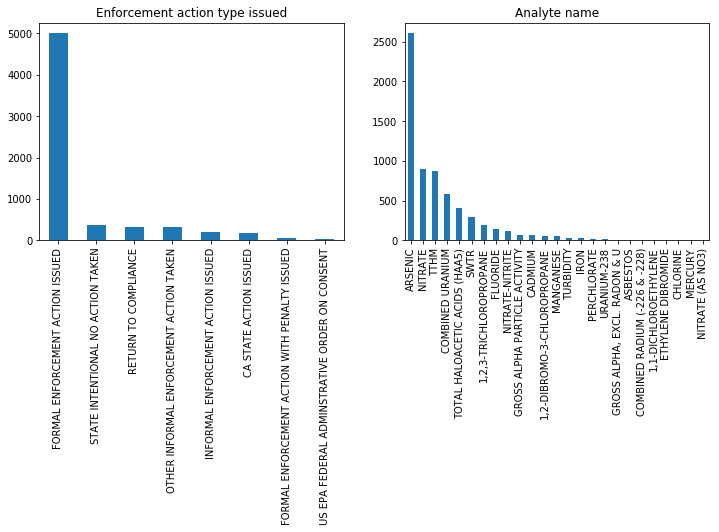

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
df.ENF_ACTION_TYPE_ISSUED.value_counts().plot.bar(title='Enforcement action type issued', ax=axs[0]);
df.ANALYTE_NAME.value_counts().plot.bar(title='Analyte name', ax=axs[1]);

In [6]:
groups = df.groupby(['WATER_SYSTEM_NUMBER', 'ANALYTE_NAME'])
last_ended_action = groups.apply(get_last_ended_action)

Do not include water system/analyte combinations that ended with a return to compliance

In [7]:
last_ended_action = last_ended_action[last_ended_action.ENF_ACTION_TYPE_ISSUED != 'RETURN TO COMPLIANCE']
last_ended_action.reset_index(drop=True, inplace=True)

# There are 330 water systems with at least one analyte out of compliance

In [8]:
groups = last_ended_action.groupby('WATER_SYSTEM_NUMBER')
print(f"{len(groups)} water systems with at least one analyte out of compliance")

330 water systems with at least one analyte out of compliance


We also compute a histogram of number of water systems with different numbers of analytes out of compliance.

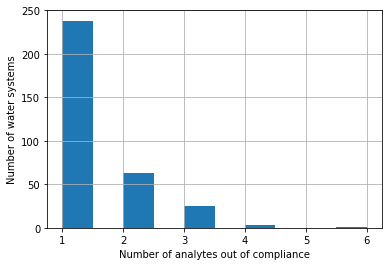

In [9]:
fig, ax = plt.subplots();
groups.apply(lambda x: len(x)).sort_values(ascending=False).hist();
ax.set_xlabel('Number of analytes out of compliance');
ax.set_ylabel('Number of water systems');